In [1]:
# https://www.kaggle.com/budincsevity/szeged-weather

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.shape

(96453, 12)

In [3]:
# Check for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.shape, df.isnull().sum()

((95936, 12),
 Formatted Date              0
 Summary                     0
 Precip Type                 0
 Temperature (C)             0
 Apparent Temperature (C)    0
 Humidity                    0
 Wind Speed (km/h)           0
 Wind Bearing (degrees)      0
 Visibility (km)             0
 Loud Cover                  0
 Pressure (millibars)        0
 Daily Summary               0
 dtype: int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [6]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000


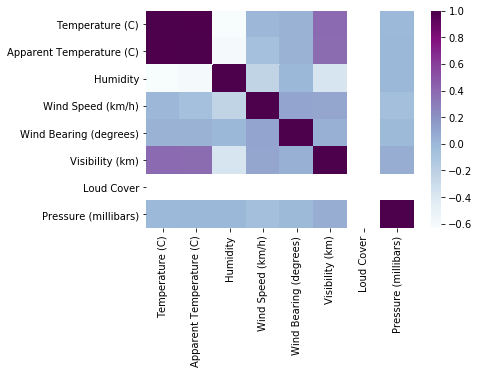

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="BuPu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f81c6d410>,
      dtype=object)

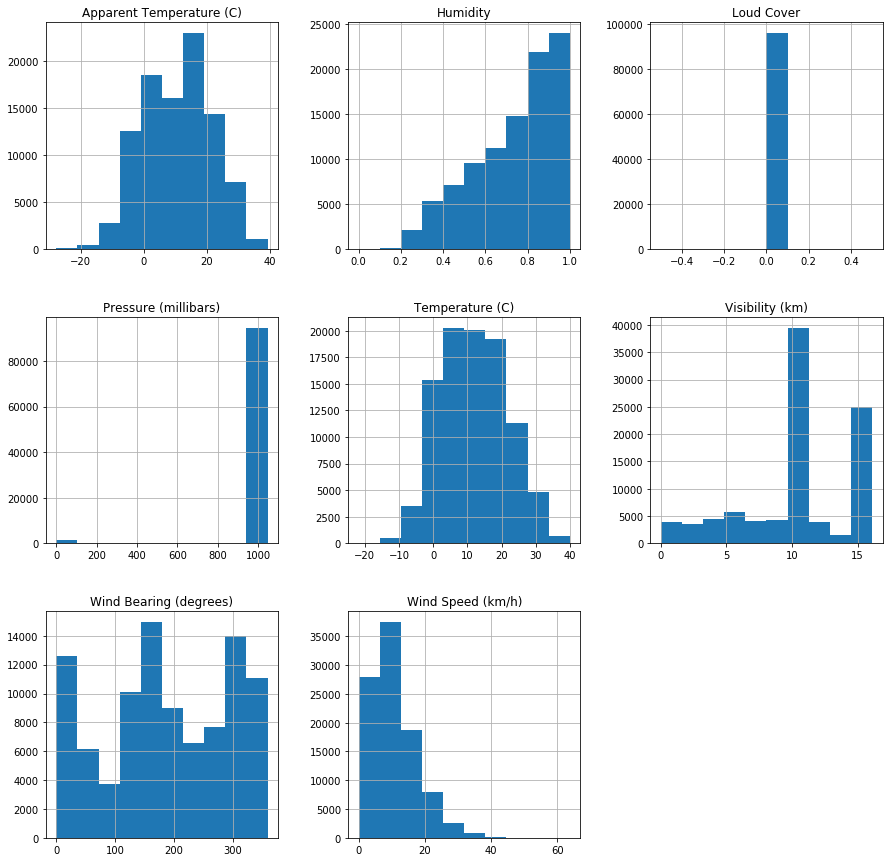

In [8]:
df.hist(figsize=(15,15))

In [9]:
# Drop Loud cover
df.drop(["Loud Cover"], axis=1, inplace=True)

In [10]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [11]:
df.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [12]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.
